## Credit card Fraud Detection

### Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('transactions.json',lines=True,orient='records')

In [ ]:
# Replacing null values with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [44]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Date
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08-13
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24


### Null values and data type for all the columns in the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

#### Dataset dimension - 786363 x 29

In [8]:
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

#### There are 11 features with null values. Out of which 6 features have 0 entries. Thus, I have dropped all the features with zero entries.

In [9]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],
                  axis=1,inplace=True)

### Descriptive statistics of some features

In [11]:
df.loc[:,['creditLimit','availableMoney','transactionAmount','currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


### Checking percentage of online vs offline transactions

In [12]:
df.cardPresent.value_counts()

False    433495
True     352868
Name: cardPresent, dtype: int64

In [15]:
round(df.cardPresent.value_counts()[0]/len(df),4) * 100

55.13

#### Thus, 55.13% transaction were online.

### Count of unique customers and accounts

In [16]:
df.accountNumber.nunique()

5000

In [17]:
df.customerId.nunique()

5000

### Credit limit types

In [18]:
df.creditLimit.unique()

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000], dtype=int64)

#### Credit limit distribution

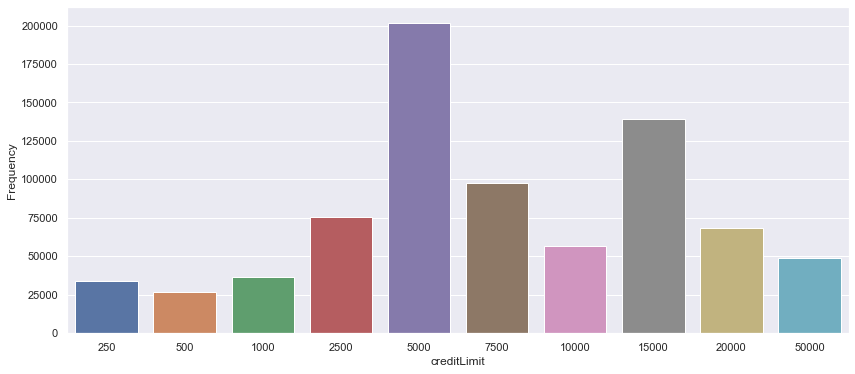

In [24]:
sns.set()
data=pd.DataFrame(df.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
data.columns=['creditLimit','Frequency']
plt.figure(figsize=(14,6))
ax = sns.barplot(x="creditLimit", y="Frequency", data=data)

#### Capital One has offered 5000 credit limit to maximum of its customers.

### Percentage of fradulent cases

In [25]:
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

In [28]:
round(df['isFraud'].value_counts() [1] / len(df),4) * 100

1.58

#### Fradulent cases account to 1.58% of the whole data.

### Transaction types

In [29]:
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', nan], dtype=object)

In [41]:
t=pd.DataFrame(df.transactionType.value_counts()).reset_index(drop=False)
t

,index,transactionType
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


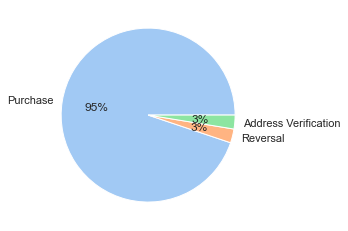

In [42]:
colors = sns.color_palette('pastel')[0:3]
labels = ['Purchase', 'Reversal', 'Address Verification']
plt.pie(t.transactionType, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Merchant categories

In [31]:
df['merchantCategoryCode'].unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [32]:
df['merchantCategoryCode'].nunique()

19

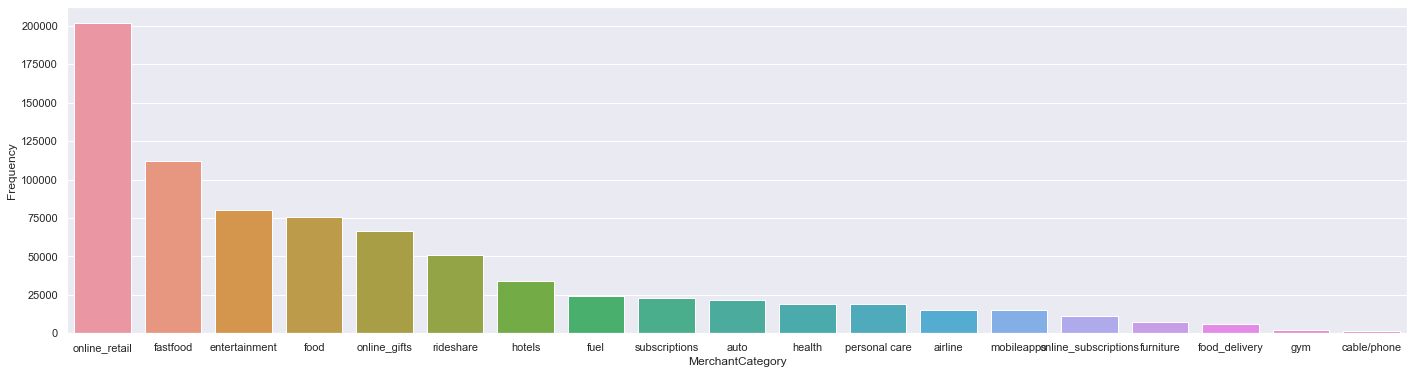

In [33]:
data=pd.DataFrame(df['merchantCategoryCode'].value_counts()).reset_index(drop=False)
data.columns=['MerchantCategory','Frequency']
plt.figure(figsize=(24,6))
ax = sns.barplot(x="MerchantCategory", y="Frequency", data=data)

#### Online retails has the highest transactions followed by fastfood and entertainment.

### Checking dataset time period

In [45]:
df['Date']=df['transactionDateTime'].apply(lambda x: x.split('T')[0])

In [47]:
df.transactionDateTime.min()

'2016-01-01T00:01:02'

In [48]:
df.transactionDateTime.max()

'2016-12-30T23:59:45'

#### The transactions in the dataset ranges from 1st January, 2016 to 30th December, 2016.

### Transaction Amount distribution plot

C:\Users\niraj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


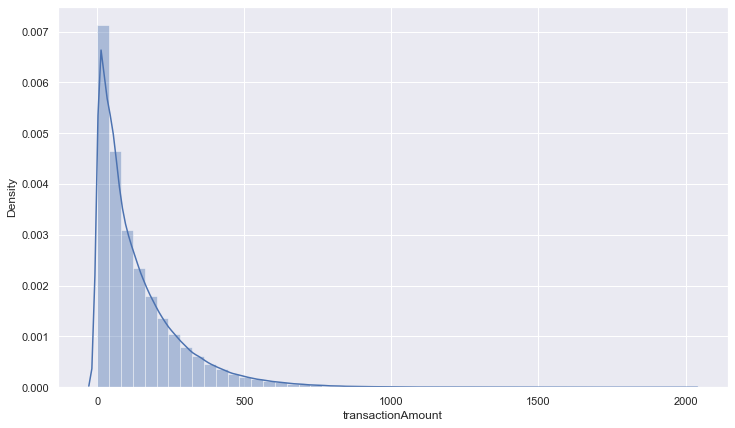

In [52]:
plt.figure(figsize=(12, 7))
sns.distplot(df.transactionAmount)

In [53]:
df.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

#### The distribution plot for transaction amount is right-skewed with average transaction amount of  136.99 and median transaction amount of 87. 

### Transaction amount histogran Plot

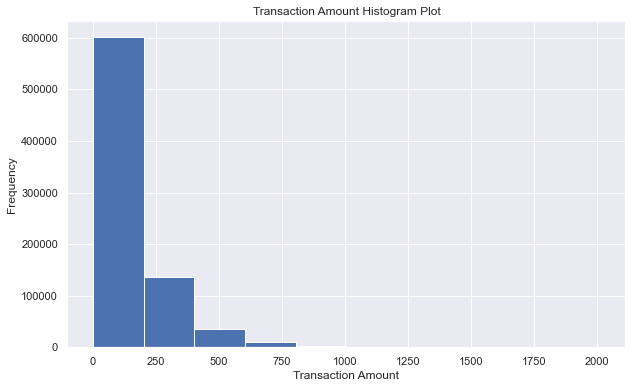

In [56]:
plt.figure(figsize=(10,6))
plt.hist(df['transactionAmount'])
plt.title('Transaction Amount Histogram Plot')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()